# Unicode provides a unique number for every character, no matter what
# the platform, no matter what the program, no matter what the language.

# Unicode : unicodedata.name(value) , unicodedata.lookup(name)

In [ ]:
# Python unicodedata module : unicodedata : 
# (1) lookup()—Takes a case-insensitive name and returns a Unicode character
# (2) name()—Takes a Unicode character and returns an uppercase name

import unicodedata
def unicode_test(value):
    name = unicodedata.name(value)
    value2 = unicodedata.lookup(name)
    print('value="%s", name="%s", value2="%s"' % (value, name, value2))

unicode_test('A')
unicode_test('$')
unicode_test('\u00a2')
unicode_test('\u20ac')
unicode_test('\u2603')

In [ ]:
place = 'café'
place

In [ ]:
name= unicodedata.name('\u00e9')
print(name)
unicodedata.lookup(name)


In [ ]:
 unicodedata.lookup('LATIN SMALL LETTER E WITH ACUTE')

In [ ]:
place = 'caf\u00e9'
place

place = 'caf\N{LATIN SMALL LETTER E WITH ACUTE}'
place

# In the preceding snippet, we inserted the é directly in the string, but we can also build a string by appending:
u_umlaut = '\N{LATIN SMALL LETTER U WITH DIAERESIS}'
u_umlaut

drink = 'Gew' + u_umlaut + 'rztraminer'
print('Now I can finally have my', drink, 'in a', place)

print(len('$'))

len('\U0001f47b')

# UTF-8  : encode('utf-8')

In [ ]:
snowman = '\u2603'
print(len(snowman))
print(snowman)

ds = snowman.encode('utf-8')   # encode('utf-8')
print(len(ds))

ds



In [ ]:
ds = snowman.encode('ascii')  # 因為'\u2603' = ☃ 不是 ASC II code 會error

In [ ]:
print(snowman.encode('ascii', 'ignore'))   # 忽視 error

# Use 'replace' to substitute ? for unknown characters:
print(snowman.encode('ascii', 'replace'))

# Use 'backslashreplace' to produce a Python Unicode character string, like unicode-escape:
print(snowman.encode('ascii', 'backslashreplace'))

# You would use this if you needed a printable version of the Unicode escape sequence.
# Use 'xmlcharrefreplace' to make HTML-safe strings:
snowman.encode('ascii', 'xmlcharrefreplace')

# Decode : decode()

In [ ]:
place = 'caf\u00e9'
print(place)
type(place)

In [ ]:
# Encode it in UTF-8 format in a bytes variable called place_bytes:
place_bytes = place.encode('utf-8')
print(place_bytes)

type(place_bytes)

In [ ]:
place2 = place_bytes.decode('utf-8')
place2

In [ ]:
# HTML Entities
from html.entities import html5
import html

print(html.unescape("&egrave;"))
print(html.unescape("&#233;"))

print(html.unescape("&#xe9;"))


print(html5["egrave"])

print(html5["egrave;"])

char = '\u00e9'
dec_value = ord(char)    # get '\u00e9' char 十進制值  
print(dec_value)
html.entities.codepoint2name[dec_value]

In [ ]:
place = 'caf\u00e9'
byte_value = place.encode('ascii', 'xmlcharrefreplace')
print(byte_value)

byte_value.decode()

In [ ]:
# Normalization
eacute1 ='é'                                     # UTF-8, pasted
eacute2 ='\u00e9'                                # Unicode code point
eacute3 ='\N{LATIN SMALL LETTER E WITH ACUTE}'   # Unicode name
eacute4 = chr(233)                               # decimal byte value
eacute5 = chr(0xe9)                              # hex byte value

print(eacute1, eacute2, eacute3, eacute4, eacute5)
print(eacute1 == eacute2 == eacute3 == eacute4 == eacute5)
print("===============================================")

# Try a few sanity checks: sanity :[ˋsænətɪ]  健全性
import unicodedata
print(unicodedata.name(eacute1))
ord(eacute1)                       # as a decimal integer
print(0xe9)                        # Unicode hex integer
print("===============================================")
# Now let’s make an accented e by combining a plain e with an acute accent:
eacute_combined1 = "e\u0301"
eacute_combined2 = "e\N{COMBINING ACUTE ACCENT}"
eacute_combined3 = "e" + "\u0301"
print(eacute_combined1, eacute_combined2, eacute_combined3)
print(eacute_combined1 == eacute_combined2 == eacute_combined3)
print(len(eacute_combined1))

#We built a Unicode character from two characters, and it looks the same as the original 'é'. 
# But as they say on Sesame Street, one of these things is not like the other:
print(eacute1 == eacute_combined1)   # False
eacute_normalized = unicodedata.normalize('NFC', eacute_combined1)
print(len(eacute_normalized))
print(eacute_normalized == eacute1)
print(unicodedata.name(eacute_normalized))

In [ ]:
# If you would like to learn more about Unicode, these links are particularly helpful:
#(1) Unicode HOWTO
#(2) Pragmatic Unicode
#(3) The Absolute Minimum Every Software Developer Absolutely,
#    Positively Must Know About Unicode and Character Sets (No Excuses!)

# Text Strings: Regular Expressions

In [ ]:
import re
result = re.match('You', 'Young Frankenstein')   # match 只看開頭的字，符不符合
print(result)

In [ ]:
# For more complex matches, you can compile your pattern first to speed up the match later:
youpattern = re.compile('You')
result = youpattern.match('Young Frankenstein')
print(result)

In [ ]:
import re
source = 'Young Frankenstein'
m = re.match('You', source)        # match starts at the beginning of source
if m:                              # match returns an object; do this to see what matched
    print(m.group())

m = re.match('^You', source)       # start anchor does the same
if m:
    print(m.group())

In [ ]:
source = 'Young Frankenstein'
m = re.match('Frank', source)    # match starts at the beginning of source所以不match
if m:
    print(m.group())
else:
    print("No match")

#  Find First Match with search() 
source = 'Young Frankenstein'   # Find First Match with search()
m = re.search('Frank', source)
if m:
    print(m.group())  

In [ ]:
#Find All Matches with findall()
import re
source = 'Young Frankenstein'
m = re.findall('n', source)
print(m)                        # findall returns a list
print('Found', len(m), 'matches')

# How about 'n' followed by any character?
source = 'Young Frankenstein'
m = re.findall('n.', source)    # n. 從n開始取2個
print(m)

# Notice that it did not match that final 'n'. We need to say that the character after 'n' is optional, with ?:
source = 'Young Frankenstein'
m = re.findall('n.?', source)   # n.?
m

In [ ]:
# Split at Matches with split()
source = 'Young Frankenstein'
m = re.split('n', source)
m                           # split returns a list

In [ ]:
source = 'Young Frankenstein'
m = re.sub('n', '?', source)
m                           # sub returns a string

# Patterns: Special Characters
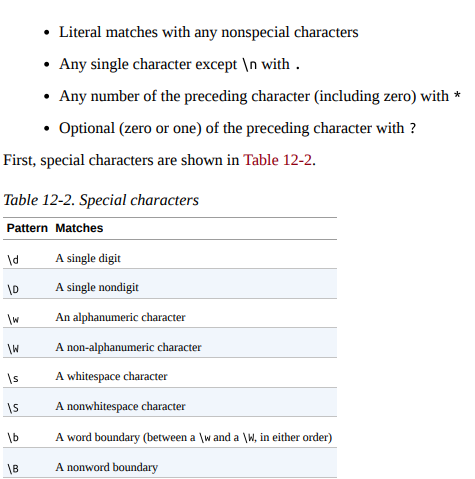

In [ ]:
import string
printable = string.printable
print(len(printable))
print(printable)

print(printable[0:50])
print(printable[50:])

# Which characters in printable are digits?
print(re.findall('\d', printable))

# Which characters are digits, letters, or an underscore?
print(re.findall('\w', printable))

# Which are spaces?
print(re.findall('\s', printable))

x = 'abc' + '-/*' + '\u00ea' + '\u0115'
# As expected, this pattern found only the letters:
re.findall('\w', x)


# Patterns: Using Specifiers
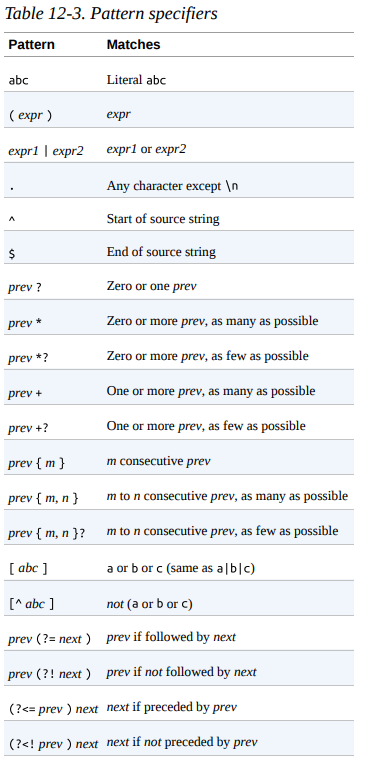

In [ ]:
source = '''I wish I may, I wish I might Have a dish of fish tonight.'''
# First, find wish anywhere
print(re.findall('wish', source))

# Next, find wish or fish anywhere:
print(re.findall('wish|fish', source))

# Find wish at the beginning:
print(re.findall('^wish', source))

# Find I wish at the beginning:
print(re.findall('^I wish', source))

# Find fish at the end:
print(re.findall('fish$', source))

# Finally, find fish tonight. at the end:
print(re.findall('fish tonight.$', source))


In [ ]:
# The characters ^ and $ are called anchors: ^ anchors the search to the
# beginning of the search string, and $ anchors it to the end. .$ matches any
# character at the end of the line, including a period, so that worked. To be 
# more precise, we should escape the dot to match it literally:
print(re.findall('fish tonight\.$', source))

# Begin by finding w or f followed by ish:
print(re.findall('[wf]ish', source))

# Find one or more runs of w, s, or h:
print(re.findall('[wsh]+', source))

# Find ght followed by a non-alphanumeric:
print(re.findall('ght\W', source))

# Find I followed by wish:
print(re.findall('I (?=wish)', source))

# And last, wish preceded by I:
print(re.findall('(?<=I) wish', source))

print(re.findall(r'\bfish', source))

In [ ]:
# Patterns: Specifying match() Output
m = re.search(r'(. dish\b).*(\bfish)', source)
print(m.group())

print(m.groups())

# If you use this pattern (?P< name > expr ), it will match expr, saving the match in group name:
m = re.search(r'(?P<DISH>. dish\b).*(?P<FISH>\bfish)', source)
print(m.group())

print(m.groups())

print(m.group('DISH'))

print(m.group('FISH'))



# Binary Data

In [ ]:
# bytes is immutable, like a tuple of bytes  : immutable(不可變)
# bytearray is mutable[ˋmjutəb!], like a list of bytes

blist = [1, 2, 3, 255]
the_bytes = bytes(blist)
print(the_bytes)

the_byte_array = bytearray(blist)
print(the_byte_array)

print(b'\x61')
print(b'\x01abc')
print(b'\xff')
b'\x01abc\xff'


In [ ]:
blist = [1, 2, 3, 255]
the_bytes = bytes(blist)
# the_bytes[1] = 127

# But a bytearray variable is mellow and mutable:
the_byte_array = bytearray(blist)
print(the_byte_array)

the_byte_array[1] = 127
print(the_byte_array)

# Each of these would create a 256-element result, with values from 0 to 255:
the_bytes = bytes(range(0, 256))
the_byte_array = bytearray(range(0, 256))
# When printing bytes or bytearray data, Python uses \xxx for
# nonprintable bytes and their ASCII equivalents for printable ones (plus
# some common escape characters, such as \n instead of \x0a). Here’s the
# printed representation of the_bytes (manually reformatted to show 16 bytes per line):
print(the_bytes)


In [ ]:
# Convert Binary Data with struct : unpack (binary to integer), pack (integer to binary)
import struct
valid_png_header = b'\x89PNG\r\n\x1a\n'
# I joined two byte strings with + and the continuation character (\)
data = b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR' + \
        b'\x00\x00\x00\x9a\x00\x00\x00\x8d\x08\x02\x00\x00\x00\xc0'
print(valid_png_header)
print(len(valid_png_header))    

if data[:8] == valid_png_header:
    width, height = struct.unpack('>LL', data[16:24])    # >: big-endian 一種二進位資料儲存或傳輸的格式，其最高位位元在最前頭
                                                         # The > means that integers are stored in big-endian format. 
                                                         # Each L specifies a four-byte unsigned long integer.

    print('Valid PNG, width', width, 'height', height)
else:
    print('Not a valid PNG')


In [ ]:
print(data[16:20])
data[20:24]

In [ ]:
import struct
print(struct.pack('>L', 154))

struct.pack('<L', 141)

# Tables 12-4 and 12-5 show the format specifiers for pack() and unpack(). 
# The endian specifiers go first in the format string.
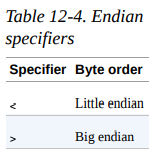 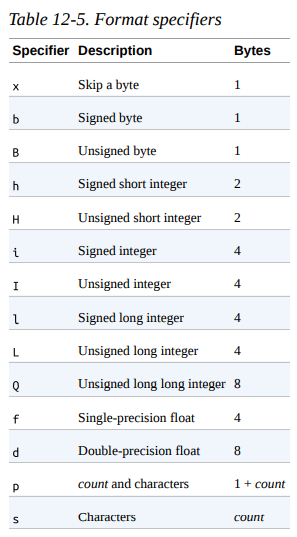

In [ ]:
struct.unpack('>2L', data[16:24])

In [ ]:
# Skip 16 bytes (16x) Read eight bytes—two unsigned long integers (2L) Skip the final six bytes (6x)
struct.unpack('>16x2L6x', data)  

# Other Binary Data Tools
(1) bitstring : https://github.com/scott-griffiths/bitstring
(2) construct : https://construct.readthedocs.io/en/latest/   , https://github.com/construct/construct/issues
(3) hachoir :  https://pypi.org/project/hachoir/
(4) binio :  https://spika.net/py/binio
(5) kaitai struct: http://kaitai.io/      

In [ ]:
from construct import *
# adapted from code at https://github.com/construct

fmt = Struct('png',
    Magic(b'\x89PNG\r\n\x1a\n'),
    UBInt32('length'),
    Const(String('type', 4), b'IHDR'),
    UBInt32('width'),
    UBInt32('height')
  )
data = b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR' + \
     b'\x00\x00\x00\x9a\x00\x00\x00\x8d\x08\x02\x00\x00\x00\xc0'
result = fmt.parse(data)
print(result)

In [ ]:
# Convert Bytes/Strings with binascii()
import binascii

valid_png_header = b'\x89PNG\r\n\x1a\n'
print(binascii.hexlify(valid_png_header))

print(binascii.unhexlify(b'89504e470d0a1a0a'))


# Bit Operators
integer variables x (decimal 5, binary 0b0101) and y (decimal 1, binary 0b0001).
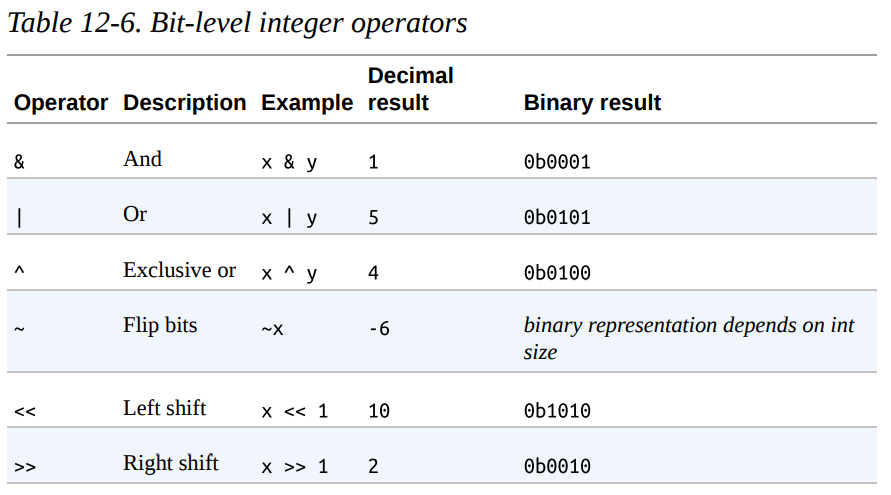